In [1]:
import pandas as pd
# @formatter:off
from alibi.explainers import PermutationImportance, plot_pd_variance, PartialDependenceVariance, \
    plot_permutation_importance,PartialDependence,plot_pd
from sklearn.model_selection import train_test_split

from models.data_process import load_adult_income_dataset
from models.run_MLP import load_model
from utils.helper import adult_process_names, adult_target_value
from utils.parser import *


In [3]:
args = parse_args()

model = load_model(baseDir='../')
# model = MLP().to(args.device)
# ckpt = torch.load('../' + args.model_path + f'MPL_{args.epoch}.pth', map_location='cpu')
# model = model.load_state_dict(ckpt)
# 加载划分数据集
dataset, target, encoder, categorical_names = load_adult_income_dataset(baseDir='../')
train_dataset, test_dataset, y_train, y_test = train_test_split(dataset,
                                                                target,
                                                                test_size=0.2,
                                                                random_state=args.random_state,
                                                                stratify=target)
predict_fn = lambda x: model.predict_anchor(x, encoder)

## PI

[[{'mean': 1.0336181540627287, 'std': 0.0026775691496948167, 'samples': array([1.0361808 , 1.03483085, 1.0296567 , 1.03579474, 1.03367655,
       1.03502349, 1.03310037, 1.03367655, 1.03540897, 1.03386876,
       1.03367655, 1.03792163, 1.03137566, 1.03022905, 1.03772792,
       1.03792163, 1.03406103, 1.03406103, 1.03502349, 1.03156701,
       1.03367655, 1.03003819, 1.03502349, 1.03483085, 1.03947395,
       1.02756351, 1.04025186, 1.03175843, 1.03080203, 1.03386876,
       1.03406103, 1.03310037, 1.03521619, 1.03502349, 1.03348442,
       1.03348442, 1.02870419, 1.0296567 , 1.03156701, 1.03290845,
       1.03156701, 1.03252482, 1.0344458 , 1.03560182, 1.03483085,
       1.03406103, 1.0327166 , 1.02813354, 1.03137566, 1.03637394])}, {'mean': 1.0157154604094196, 'std': 0.002041935430620722, 'samples': array([1.01518097, 1.01351552, 1.01796891, 1.0144401 , 1.0174101 ,
       1.01722396, 1.0144401 , 1.01666597, 1.01815531, 1.0148104 ,
       1.0137003 , 1.0148104 , 1.02039754, 1.0151809

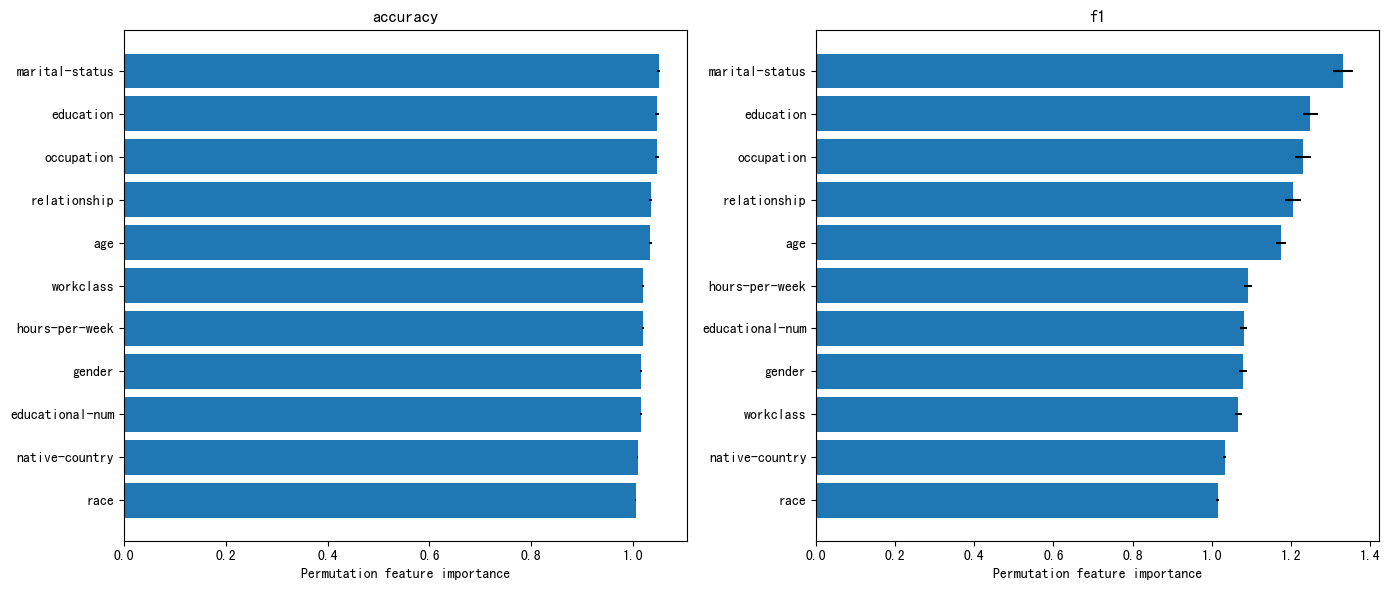

In [3]:
pfi = PermutationImportance(predictor=predict_fn,
                            score_fns=['accuracy', 'f1'],
                            feature_names=adult_process_names)

exp = pfi.explain(X=test_dataset, y=y_test)
print(exp.feature_importance)
plot_permutation_importance(exp,
                            n_cols=2,
                            fig_kw={'figwidth': 14, 'figheight': 6});


## PDV

100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
The length of `target_names` does not match the number of predicted outputs. Ensure that the lengths match, otherwise a call to the `plot_pd` method might raise an error or produce undesired labeling.
`targets` should be a list containing a single element when ``summarise=False``.By default the first element in the list is considered.


ValueError: could not broadcast input array from shape (50,) into shape (1,)

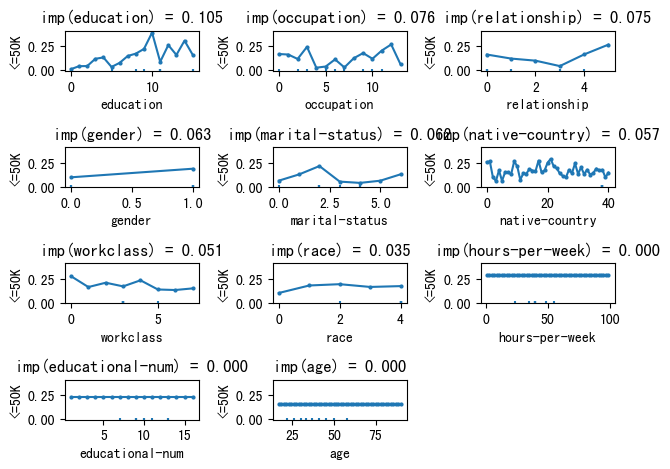

In [4]:
explainer = PartialDependenceVariance(predictor=predict_fn,
                                      feature_names=adult_process_names,
                                      target_names=adult_target_value, verbose=True)
exp_importance = explainer.explain(X=train_dataset,
                                   method='importance',
                                   grid_resolution=50)
plot_pd_variance(exp=exp_importance, summarise=False)
df = pd.DataFrame( exp_importance.pd_values)


In [5]:
# exp_interaction = explainer.explain(X=train_dataset,
#                                     method='interaction',
#                                     grid_resolution=30)
# plot_pd_variance(exp=exp_interaction,
#                  features='all',    # considers plotting all features
#                  top_k=10,          # plots only the top 10 features from all the `features`
#                  fig_kw={'figwidth': 7, 'figheight': 5});

  0%|          | 0/55 [00:07<?, ?it/s]


KeyboardInterrupt: 

## PD

In [ ]:
explainer = PartialDependence(predictor=predict_fn,
                              feature_names=adult_process_names,
                              target_names=adult_target_value,
                              categorical_names=categorical_names)
# select temperature, humidity, wind speed, and season
features = [adult_process_names.index('age'),
            adult_process_names.index('workclass'),
            adult_process_names.index('relationship'),
            adult_process_names.index('occupation')]
exp = explainer.explain(X=train_dataset,
                        features=features,
                        kind='average')
plot_pd(exp=exp,
        n_cols=3,
        sharey='row',
        fig_kw={'figheight': 10, 'figwidth': 15});

ImportError: Attempted to use IntegratedGradients without the correct optional dependencies installed. This may be due to missing or incompatible versions of dependencies. To install the correct optional dependencies, run `pip install alibi[tensorflow]` from the command line. For more information, check the installationdocumentation at https://docs.seldon.io/projects/alibi/en/latest/overview/getting_started.html.